In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error

cerveja_df = pd.read_csv("Consumo_cerveja.csv", sep=';')
cerveja_df.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


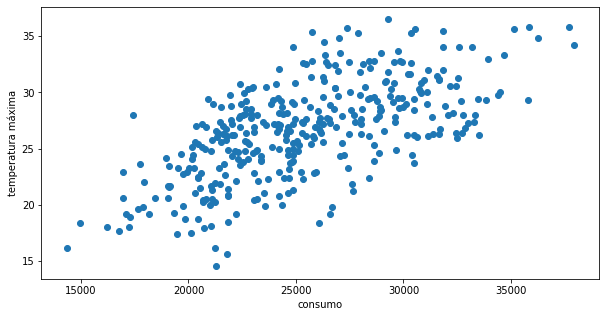

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.scatter(cerveja_df['consumo'], cerveja_df['temp_max'])
plt.xlabel('consumo')
plt.ylabel('temperatura máxima')

plt.show()

In [ ]:
sample = cerveja_df.sample(365)[['consumo', 'temp_max']]

Função de predição

In [ ]:
def prediction(t0, t1, x):
    
    hx = t0 * 1 + t1 * x
    
    return hx

Função de custo

In [ ]:
def cost(y, p):
    
    cost = 0
    
    for val in zip(y, p):
        cost += (val[0] - val[1]) ** 2
        
    cost = cost / (2 * (len(y)))
    
    return cost

Normalização do vetor (cada valor - menor valor / 100)

In [ ]:
def normalize(vector):
    
    menor = np.min(vector)
    
    norm = [(val - menor) / 1000 for val in vector]
    
    return norm

In [ ]:
theta_0 = 10
theta_1 = 0

use_sample = True

In [ ]:
src = cerveja_df

if use_sample:
    src = sample

ncons = normalize(src['consumo'])
src

,consumo,temp_max
156,31129,26.1
153,21055,21.7
17,30524,35.6
286,26793,28.5
352,32536,31.3
...,...,...
246,19345,19.3
345,29579,30.8
112,23198,24.9
315,29267,31.8


In [ ]:

preds = [prediction(theta_0, theta_1, temp) for temp in cerveja_df['temp_max']]

#for res in zip(preds, ncons):
#   print(res)

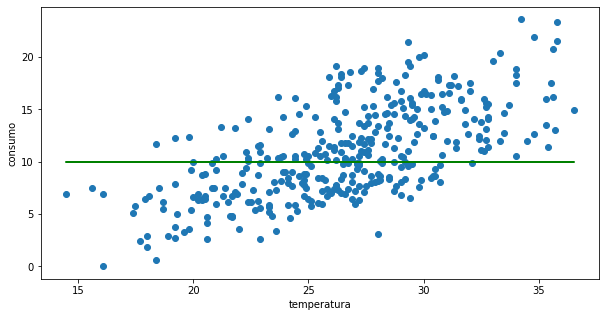

In [ ]:
plt.scatter(src['temp_max'], ncons)
plt.xlabel('temperatura')
plt.ylabel('consumo')
plt.plot([a for a in src['temp_max']], preds, 'g')  # Linha de predição
plt.show()

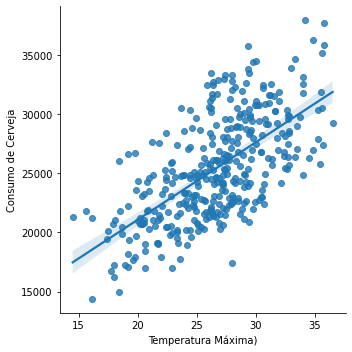

In [ ]:
ax = sns.lmplot(x = "temp_max", y = "consumo", data = cerveja_df)
ax.set_xlabels("Temperatura Máxima)")
ax.set_ylabels("Consumo de Cerveja")
ax

In [ ]:
y = cerveja_df[['consumo']]
X = cerveja_df[['temp_max']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

lr = LinearRegression().fit(X_train, y_train)
lr.coef_

array([[644.47919393]])

In [ ]:
pred = lr.predict(X_test)
mean_squared_error(pred, y_test)

11701677.965499649